In [129]:
from random import randint, randrange

### Б дерево
**Б дерево** - дерево страниц, каждая страница содержит n-2*n ключей, кроме быть может корня, где n - порядок б дерева </br>
Корневая страница должна помещаться в оперативную память  </br>
**Б дерево** - дерево у которого, хотябы половина ключей всех страниц заполнено:
1. общая высота О(logN)
2. любая страница либо лист (ключи есть, потомков нет), либо 
3. все листья на одном уровне 

крастность дерева 2 - минимум 2 потомка  </br> 
K - кратность дерева </br>
стр[k,2k] </br>
 </br>
На странице храним:
1. **ключи** храним в отсортированном массиве, потому что можно искать дихтамией, а не перебором
отсортированы в порядке возрастания, массив - компактная структура
2. **указатель** на другие страницы

**Самое важное**: фишка B-дерева в том, что жёсткий диск читает/пишет данные большими кусочками зараз (например, по 4кб), и количество потомков в вершине подбирается под это ограничение.<br/>
Получается очень "невысокое" дерево, хорошо подходящее для хранения на диске. Диск сильно медленнее процессора, поэтому мы можем себе позволить хранить потомков в массиве и поддерживать <br/>их упорядоченность при вставке/удалении — всё равно перезапись делается кусками по 4кб (или сколько там в новых)

### Красно-чёрное дерево
**Красно-чёрное дерево** — двоичное дерево поиска, в котором каждый узел имеет атрибут цвета. При этом:
1. Узел может быть либо красным, либо чёрным и имеет двух потомков;
2. Корень — как правило чёрный. Это правило слабо влияет на работоспособность модели, так как цвет корня всегда можно изменить с красного на чёрный;
3. Все листья, не содержащие данных — чёрные.
4. Оба потомка каждого красного узла — чёрные.
5. Любой простой путь от узла-предка до листового узла-потомка содержит одинаковое число чёрных узлов.

In [148]:
from BTreeCount import BTree
from RBTreeCount import RBtree
import requests
import io
from random import randint
from tqdm import tqdm
from matplotlib import pyplot as plt
import time

### Тексты
#### строим коллекцию -> из нее тексты

In [16]:
response = requests.get('https://raw.githubusercontent.com/danakt/russian-words/master/russian.txt')

text = response.content.decode('cp1251')

with open('russian.txt', 'wb') as ru:
    ru.write("\n".join(text.upper().split('\n')).encode('utf-8'))

In [75]:
coll_len = 500
max_text = 10000
step = 100

In [144]:
with io.open('russian.txt', encoding='utf-8') as ru1:
    ru1 = ru1.read().splitlines()

collection = []
for i in range(coll_len):
    collection.append(ru1[randint(1,153262)])

with open('collection.txt', 'wb') as ru:
    ru.write("\n".join(set(collection)).encode('utf-8'))

len(collection)

500

#### От длины текста при фиксированной коллекции

In [150]:
btree = []
rbtree = []
x_axis = []
timeB = []
timeRB = []


#увеличиваем 
for i, temp in zip(range(coll_len+step,max_text,step),tqdm(range(coll_len,max_text,step))):
    #заполняем коллекцией, чтобы она вся точно была 
    text = collection.copy()
    #заполняем текст до нужной длинны
    while len(text)<i:
        text.append(collection[randint(1,coll_len-1)])
    x_axis.append(i)
    bt = BTree(3)
    rbt = RBtree()
    start = time.perf_counter()
    for j in range(i):
        rbt.searchAndInsert(text[j])
    end = time.perf_counter()
    rbtree.append((rbt.sravn,rbt.vkluch))
    timeRB.append(end-start)
    start = time.perf_counter()
    for j in range(i):
        bt.searchAndInsert(text[j])
    end = time.perf_counter()
    timeB.append(end-start)
    btree.append((bt.sravn,bt.vkluch))
    


 98%|█████████▊| 93/95 [00:05<00:00, 16.48it/s]


In [146]:
def show_graf(text, index):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(x_axis, [a[index] for a in btree],color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('Btree',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(x_axis, [a[index] for a in rbtree],color='tab:red')
    ax2.set_ylabel('RBtree',color = 'tab:red')

    axs[1].plot(x_axis, [a[index] for a in btree],color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_ylabel('Btree',color = 'tab:blue')
    axs[1].set_xlabel('N')

    axs[1].plot(x_axis, [a[index] for a in rbtree],color='tab:red')
    axs[1].set_ylabel('RBtree',color = 'tab:red')
    axs[1].legend(['Btree','RBtree'])
    fig.autofmt_xdate()
    fig.tight_layout()

In [155]:
def show_graf_TIME(text):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(x_axis, timeB,color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('Btree',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(x_axis, timeRB,color='tab:red')
    ax2.set_ylabel('RBtree',color = 'tab:red')

    axs[1].plot(x_axis, timeB,color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_ylabel('Btree',color = 'tab:blue')
    axs[1].set_xlabel('N')

    axs[1].plot(x_axis, timeRB,color='tab:red')
    axs[1].set_ylabel('RBtree',color = 'tab:red')
    axs[1].legend(['Btree','RBtree'])
    fig.autofmt_xdate()
    fig.tight_layout()

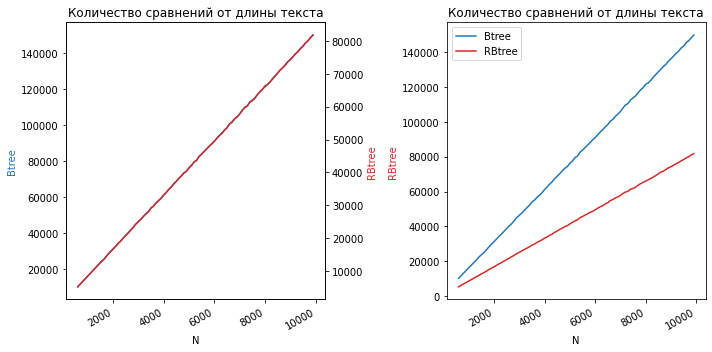

In [137]:
show_graf('Количество сравнений от длины текста',0)

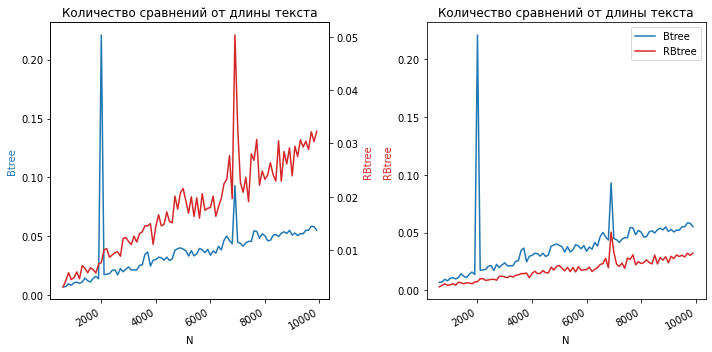

In [157]:
show_graf_TIME('Количество сравнений от длины текста')

TypeError: 'float' object is not subscriptable

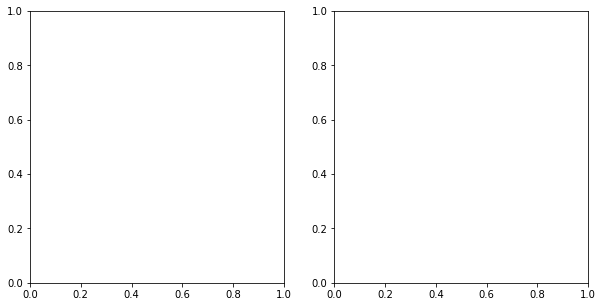

In [154]:
show_graf('Количество включений от длины текста',1)

#### От длины коллекции, длина текста фиксирована

In [141]:
btree = []
rbtree = []
x_axis = []

# меняем длину коллекции
for i in range(1,coll_len):
    x_axis.append(i)
    #заполняем , чтобы вся коллекция точно вошла 
    tmp_text = collection.copy()[1:i]
    #заполняем до мак текста элементами колекции нужной длинны
    while len(tmp_text)<max_text :
        tmp_text.append(collection[randint(1,i)])
    #заполняем дерево
    bt = BTree(3)
    rbt = RBtree()
    for j in range(max_text-1):
        bt.searchAndInsert(tmp_text[j])
        rbt.searchAndInsert(tmp_text[j])
    btree.append((bt.sravn,bt.vkluch))
    rbtree.append((rbt.sravn,rbt.vkluch))

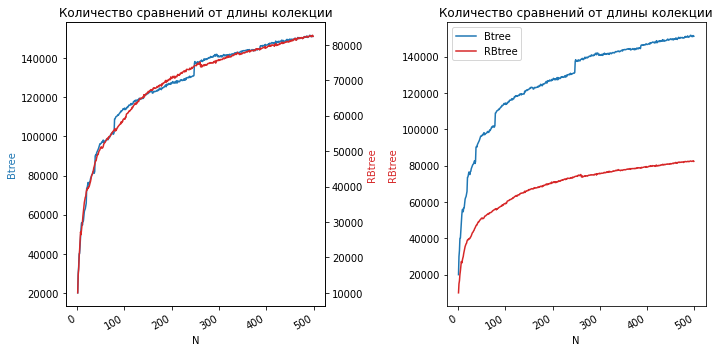

In [142]:
show_graf('Количество сравнений от длины колекции',0)

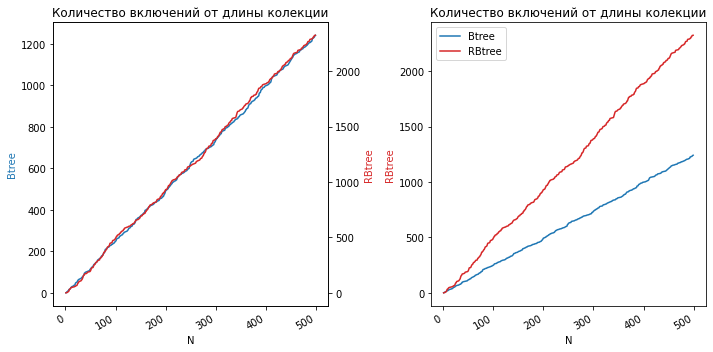

In [143]:
show_graf('Количество включений от длины колекции',1)

In [147]:
collection[0:10]

['ВОВКУ',
 'АНГАЖИРУЕМ',
 'ВЕРЕЙНЫМИ',
 'ВРАЧУЮЩИЙСЯ',
 'ВЕНИАМИНОВИЧУ',
 'ВОДОРОДИСТАЯ',
 'БАЦАЮЩИМ',
 'АНТИСЕПТИКЕ',
 'АНЕВРИЗМОМ',
 'ВИДЯЩИХСЯ']